# 3. Question 3 : Discrete Hopfield Net

# Importing Dependencies

In [29]:
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt

# Part 1: Loading images

In [30]:
# Set the threshold value
threshold = 180

path = os.getcwd()

path_train = path + '/pacman_Train.jpg'
path_test  = path + '/pacman_Test.jpg'

def read_binarize_img(path_img):
    
    # Read the image
    img_train = Image.open(path_img).convert(mode="L")
    img_train = img_train.resize(size=(100,100))
    
    # Binarize the image
    img_train_array = np.asarray(img_train,dtype=np.uint8)
    x = np.zeros(img_train_array.shape,dtype=np.float)
    x[img_train_array > threshold] = 1
    x[x==0] = -1
    
    return x

In [78]:
# Read images
train = read_binarize_img(path_train)
test = read_binarize_img(path_test)

/var/folders/vm/v0nt374s6078m_5v598g5q4m0000gn/T/ipykernel_12444/1177566195.py:17: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x = np.zeros(img_train_array.shape,dtype=np.float)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


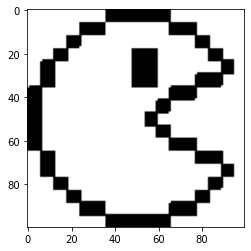

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


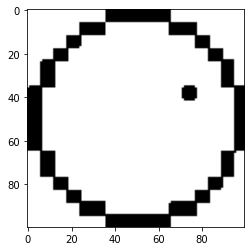

In [80]:
# Plot images
plt.imshow(np.repeat(train[:,:,np.newaxis], repeats=3, axis=2))
plt.show()
plt.imshow(np.repeat(test[:,:,np.newaxis], repeats=3, axis=2))
plt.show()

# Define Model

In [104]:
class DiscreteHopfieldNet(object):

    def __init__(self):
        self.weight = None

    # Modified Hebbian Learning Rule
    def train(self, data,):
        mat = np.vstack(data)
        I = len(data) * np.identity(np.size(mat, 1))
        self.weight = np.dot(mat.T, mat) - I

    def predict(self, data, theta=0.5, iterations=1000):        
        # Random orders for computations
        indexs = np.random.randint(0, len(self.weight) - 1, (iterations, len(data)))
        for ind in indexs:
            diagonal = np.diagonal(np.dot(self.weight[ind], data.T))
            diagonal = np.expand_dims(diagonal, -1)
            value = np.apply_along_axis(lambda x: 1 if x > theta else -1, 1, diagonal)

            for i in range(len(data)):
                data[i, ind[i]] = value[i]

        return data

In [105]:
size = (100, 100)

In [106]:
model = DiscreteHopfieldNet()

# Part 2: Training(Constructing Weight Matrix)

In [107]:
%%time
model.train([train.flatten()])

CPU times: user 1.64 s, sys: 419 ms, total: 2.05 s
Wall time: 970 ms


# Part 3

## Iterations = 1000

In [124]:
%%time
recovery = model.predict(np.array([test.flatten()], copy=False),iterations=1000)

CPU times: user 428 ms, sys: 11.5 ms, total: 440 ms
Wall time: 90.3 ms


In [125]:
recovery = recovery[0].reshape(size)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


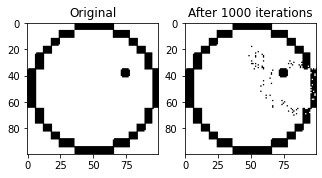

In [127]:
fig = plt.figure(figsize=(8, 8))
fig.add_subplot(1, 3, 1)
plt.imshow(np.repeat(test[:,:,np.newaxis], repeats=3, axis=2),cmap='Greys')
plt.title('Original')
fig.add_subplot(1, 3, 2)
plt.imshow(np.repeat(recovery[:,:,np.newaxis], repeats=3, axis=2),cmap='Greys')
plt.title('After 1000 iterations')
plt.show()

## Iterations = 50000


In [128]:
%%time
recovery = model.predict(np.array([test.flatten()], copy=False),iterations=50000)


CPU times: user 14.9 s, sys: 154 ms, total: 15 s
Wall time: 3.05 s


In [129]:
recovery = recovery[0].reshape(size)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


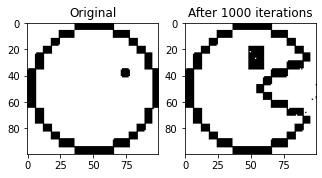

In [130]:
fig = plt.figure(figsize=(8, 8))
fig.add_subplot(1, 3, 1)
plt.imshow(np.repeat(test[:,:,np.newaxis], repeats=3, axis=2),cmap='Greys')
plt.title('Original')
fig.add_subplot(1, 3, 2)
plt.imshow(np.repeat(recovery[:,:,np.newaxis], repeats=3, axis=2),cmap='Greys')
plt.title('After 1000 iterations')
plt.show()


# Part 4


## Iterations = 1000


In [131]:
test2 = read_binarize_img('ghost.jpg')

/var/folders/vm/v0nt374s6078m_5v598g5q4m0000gn/T/ipykernel_12444/1177566195.py:17: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x = np.zeros(img_train_array.shape,dtype=np.float)


In [132]:
%%time
recovery = model.predict(np.array([test2.flatten()], copy=False),iterations=1000)


CPU times: user 416 ms, sys: 9.42 ms, total: 425 ms
Wall time: 86.6 ms


In [133]:
recovery = recovery[0].reshape(size)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


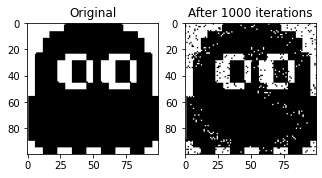

In [135]:
fig = plt.figure(figsize=(8, 8))
fig.add_subplot(1, 3, 1)
plt.imshow(np.repeat(test2[:,:,np.newaxis], repeats=3, axis=2),cmap='Greys')
plt.title('Original')
fig.add_subplot(1, 3, 2)
plt.imshow(np.repeat(recovery[:,:,np.newaxis], repeats=3, axis=2),cmap='Greys')
plt.title('After 1000 iterations')
plt.show()


## Iterations = 50000


In [145]:
%%time
recovery = model.predict(np.array([test2.flatten()], copy=False),iterations=50000)


CPU times: user 14.2 s, sys: 105 ms, total: 14.4 s
Wall time: 2.88 s


In [146]:
recovery = recovery[0].reshape(size)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


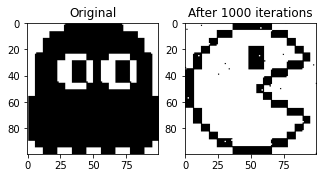

In [148]:
fig = plt.figure(figsize=(8, 8))
fig.add_subplot(1, 3, 1)
plt.imshow(np.repeat(test2[:,:,np.newaxis], repeats=3, axis=2),cmap='Greys')
plt.title('Original')
fig.add_subplot(1, 3, 2)
plt.imshow(recovery,cmap='Greys')
plt.title('After 1000 iterations')
plt.show()
